## Generate Mel Spectrograms for each Class

### Covid cough classification 

In this notebook, Mel Spectrograms are generated and saved as images in a respective subdirectory for each class. 

In [8]:
import numpy as np
from glob import glob
import librosa 
import matplotlib.pyplot as plt
import pylab
import librosa.display

In [9]:
def get_mel(y, sr, class_name, count):
    # generate the spectrogram
    time = np.arange(0, len(y)) / sr
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)
    # plot 
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB,x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
    pylab.axis('off') # no axis
    
    # save the spectrogram 
    name_path = "spectrograms/" + str(class_name) + "/" + str(count) + ".png"
    plt.savefig(name_path, bbox_inches = 'tight', pad_inches = 0)

### Loop through all files

In [10]:
import os
directory = 'mod_data'

In [11]:
master_dict = {}
for subdir in os.listdir(directory):
    path = directory + "/" + subdir
    d = glob(path + '/*.wav')
    master_dict[subdir] = d

In [12]:
for key in master_dict:
    print(key)

.DS_Store
neg
pos


### Generate Mel Spectrograms

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


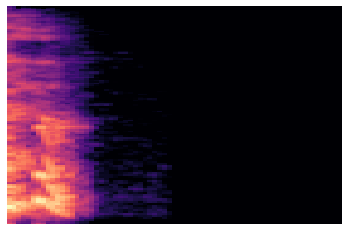

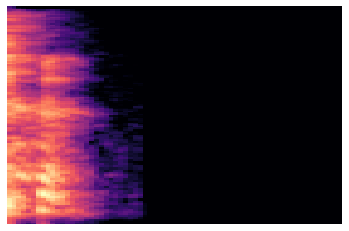

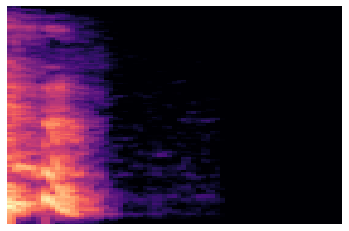

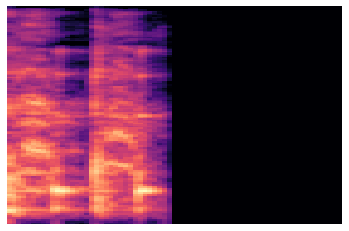

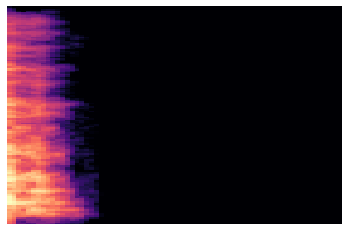

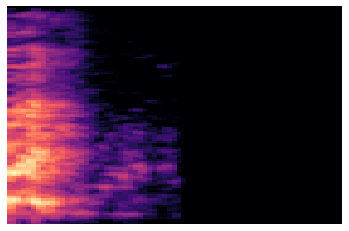

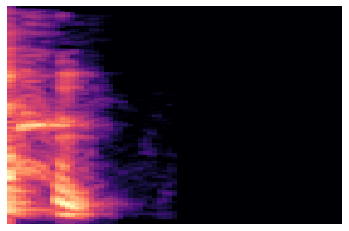

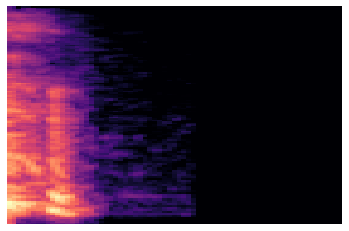

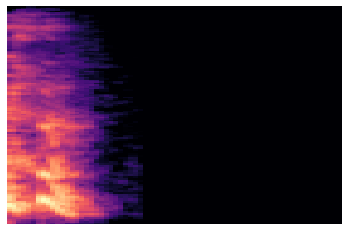

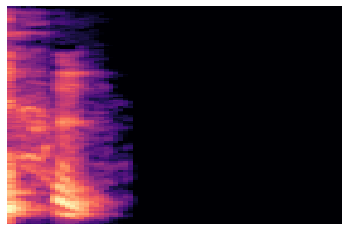

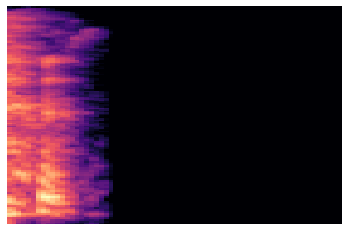

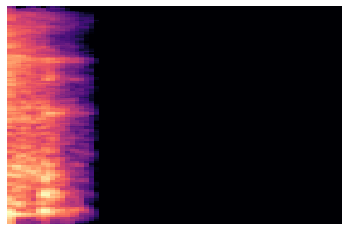

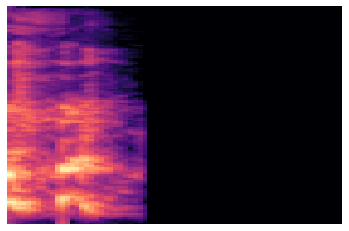

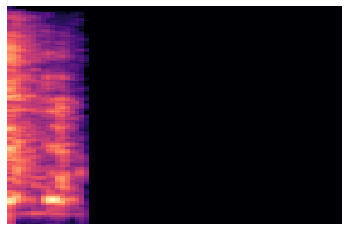

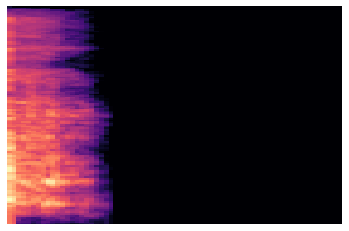

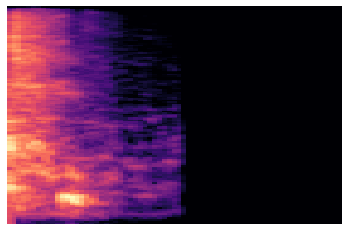

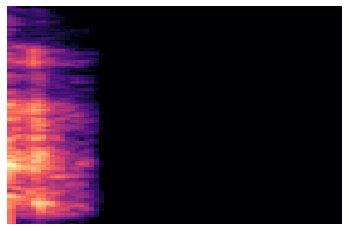

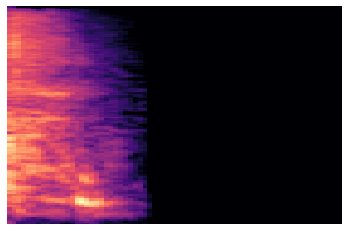

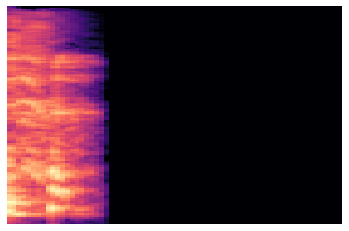

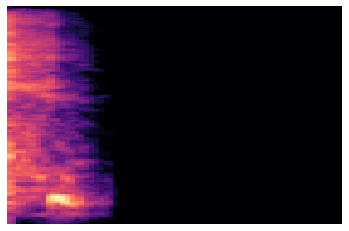

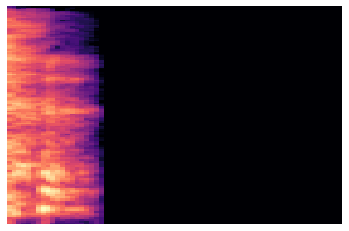

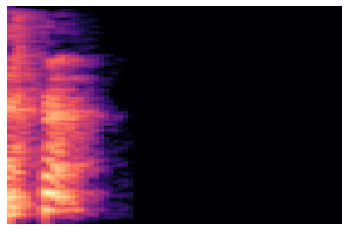

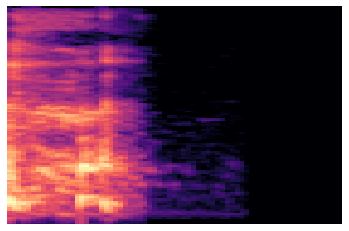

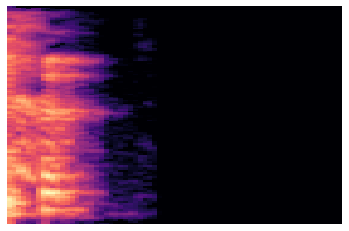

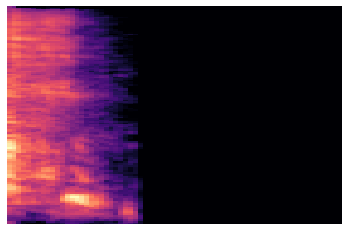

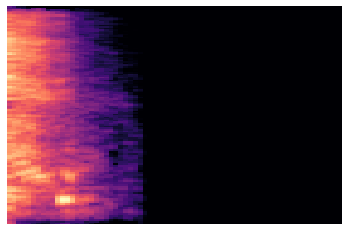

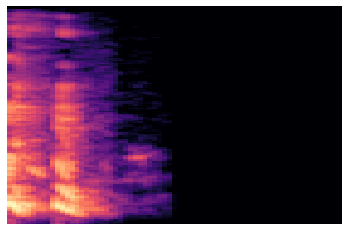

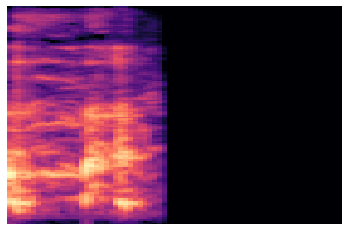

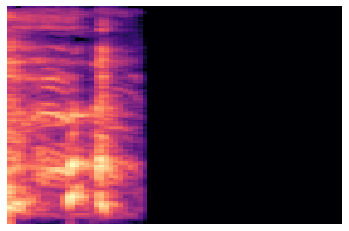

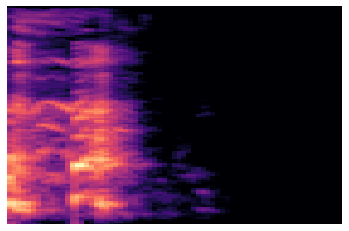

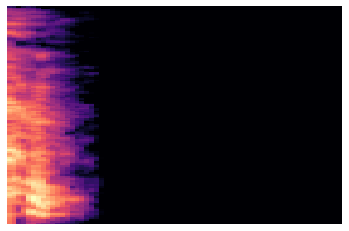

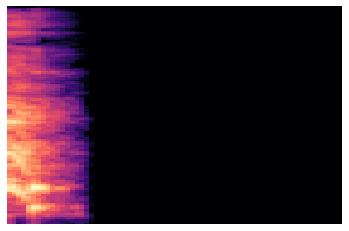

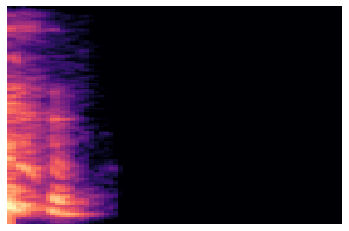

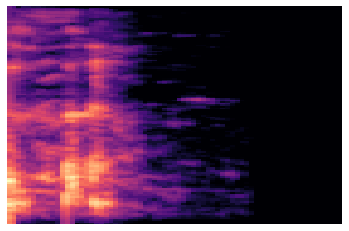

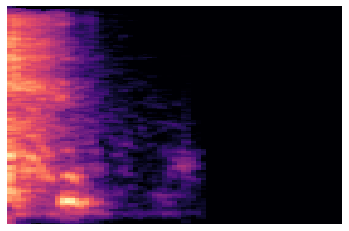

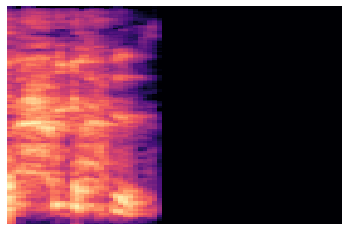

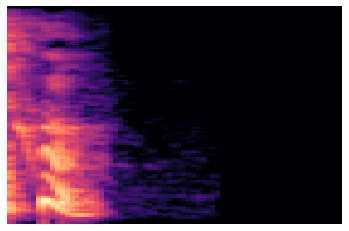

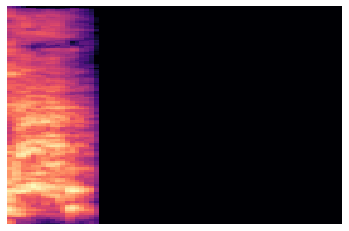

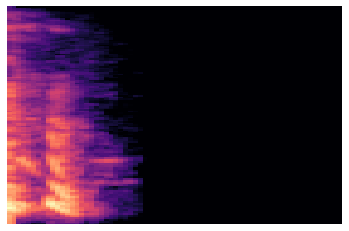

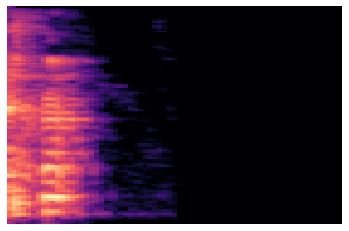

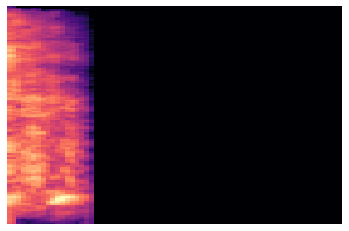

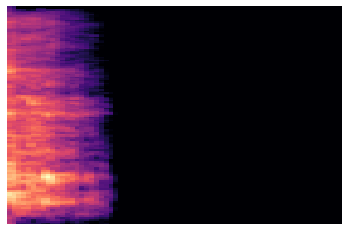

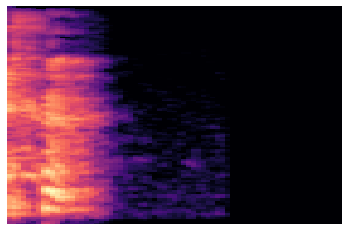

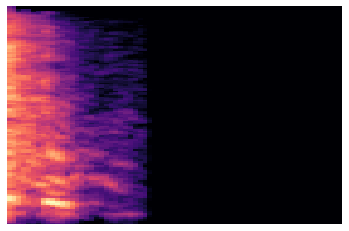

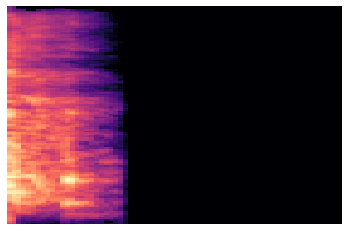

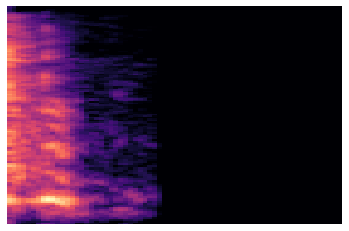

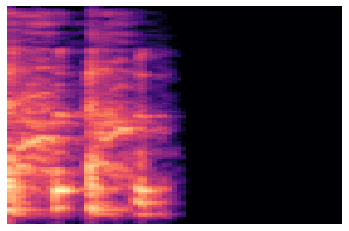

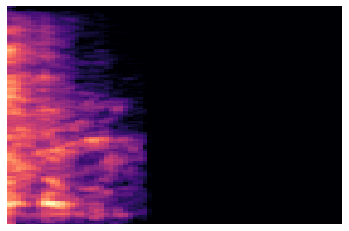

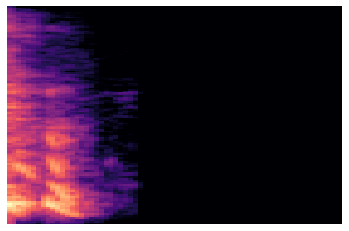

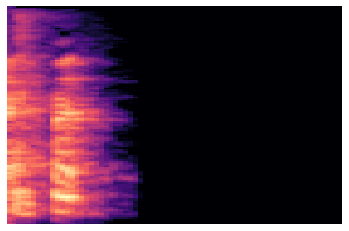

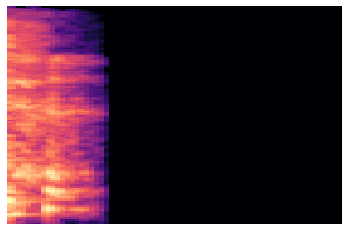

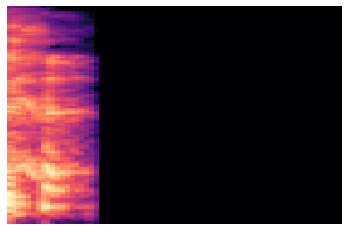

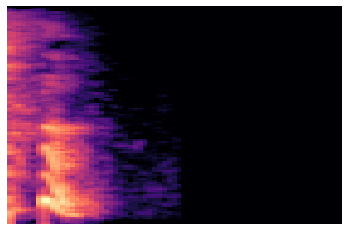

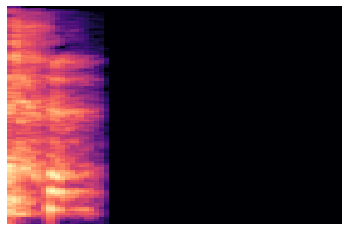

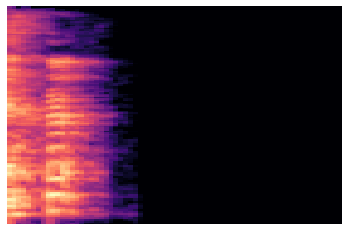

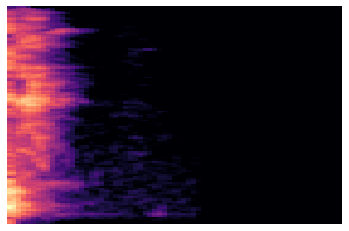

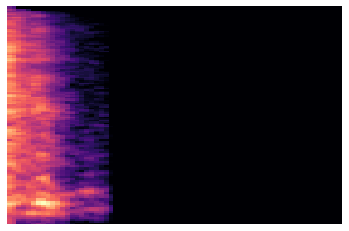

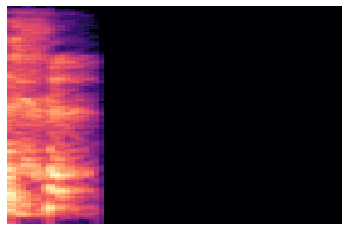

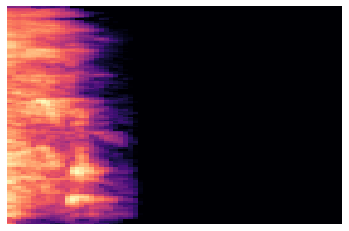

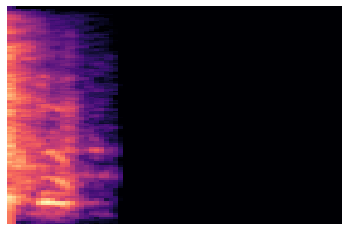

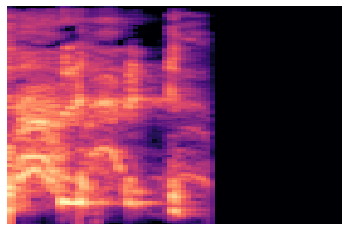

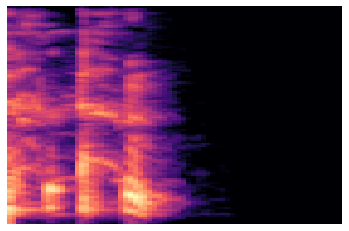

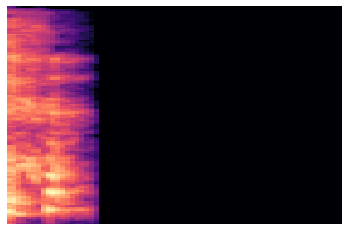

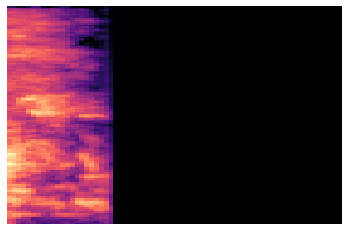

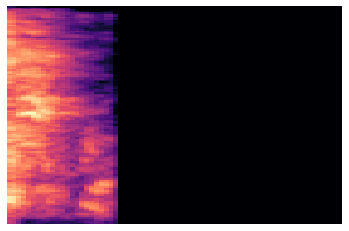

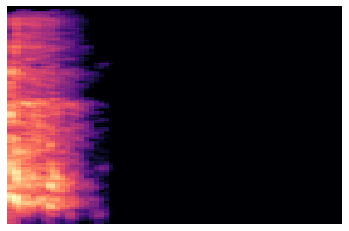

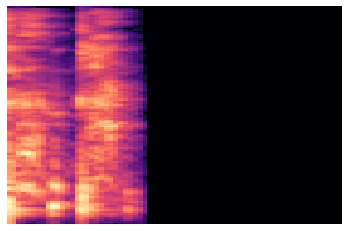

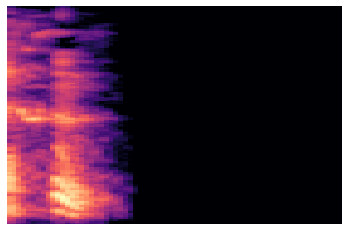

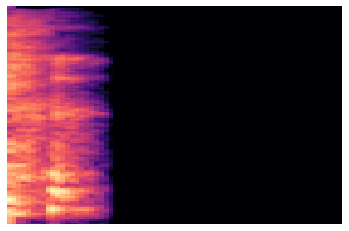

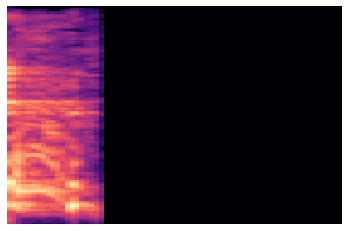

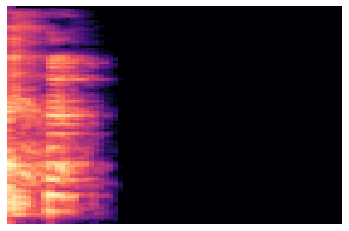

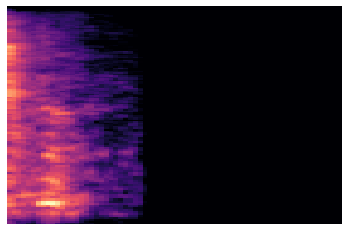

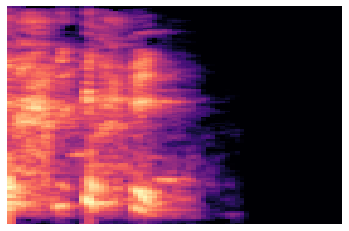

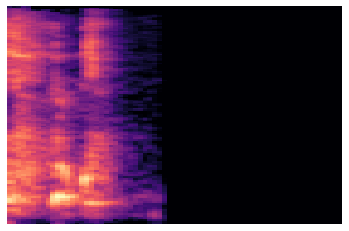

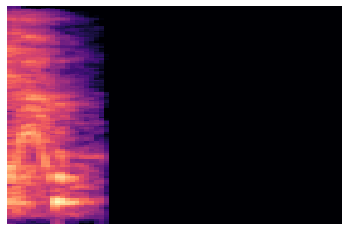

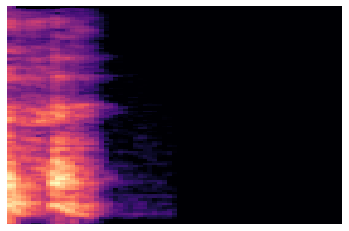

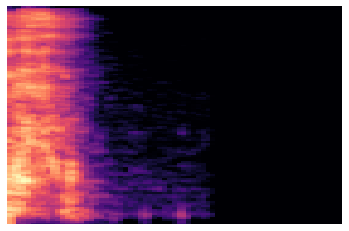

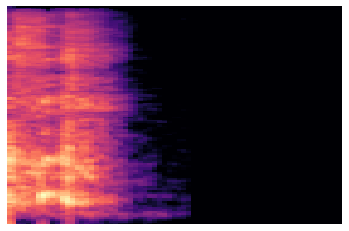

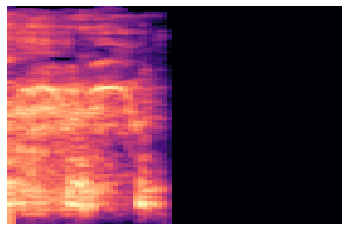

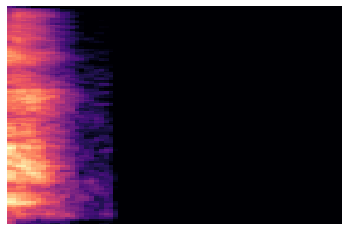

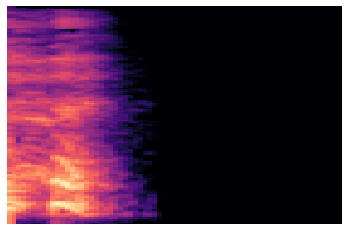

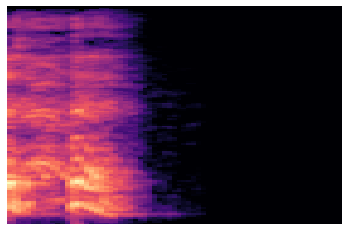

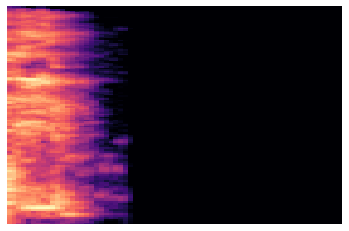

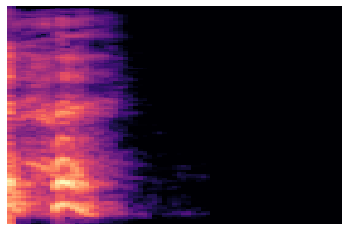

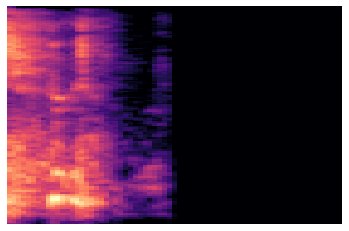

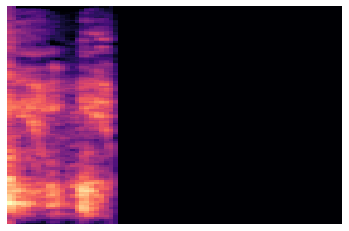

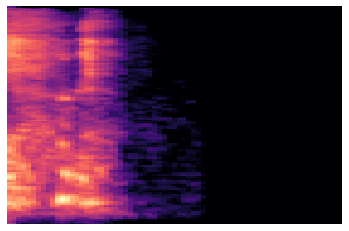

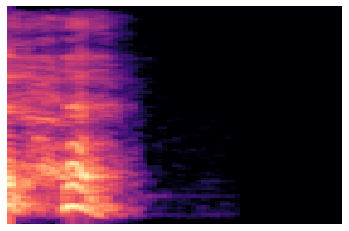

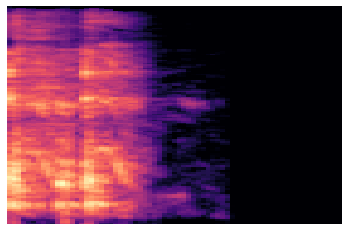

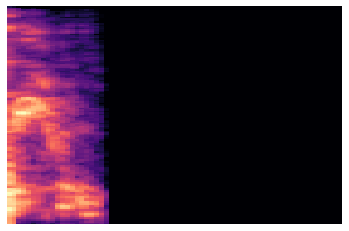

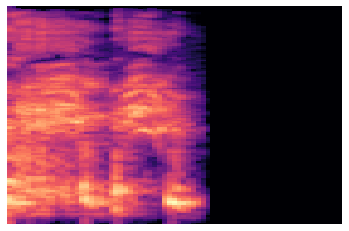

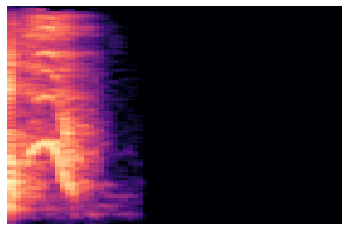

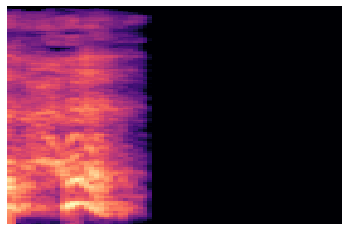

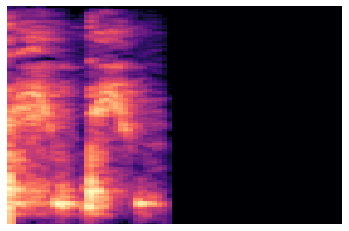

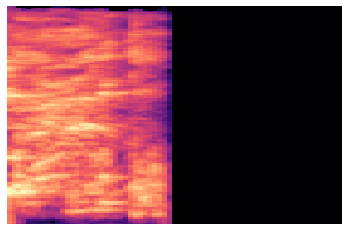

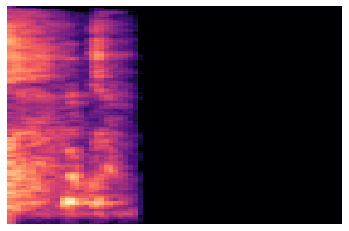

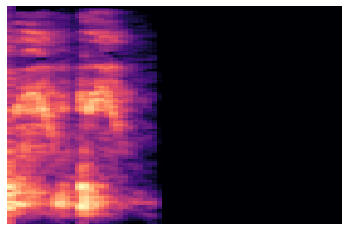

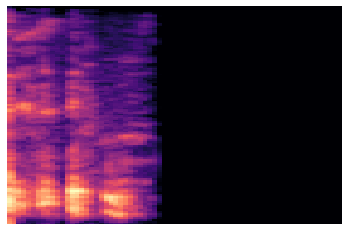

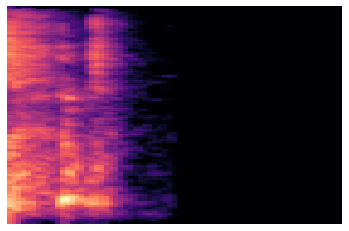

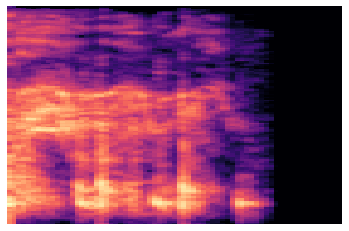

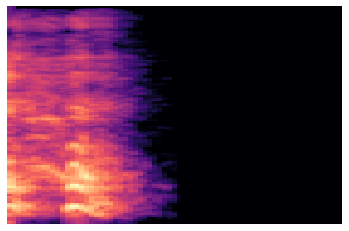

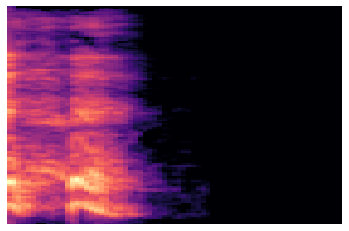

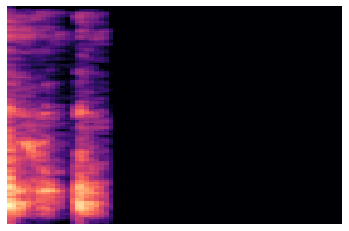

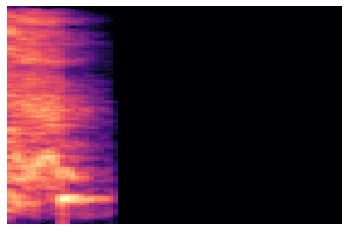

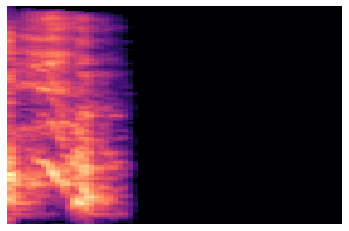

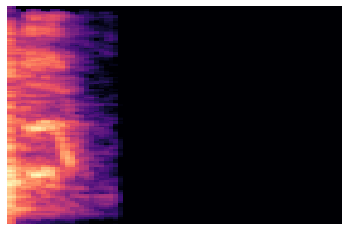

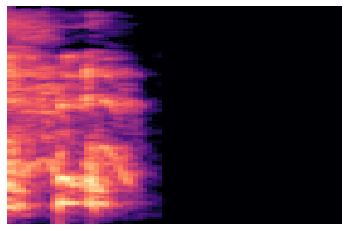

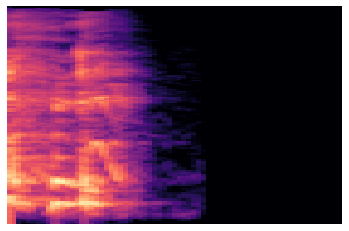

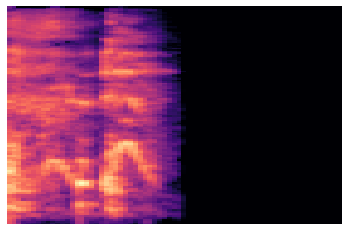

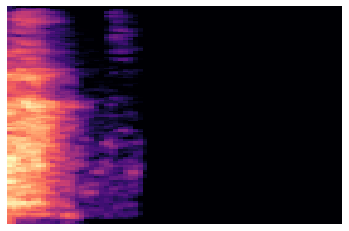

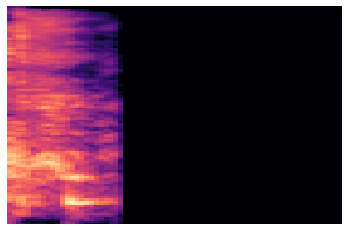

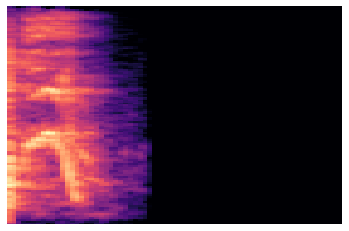

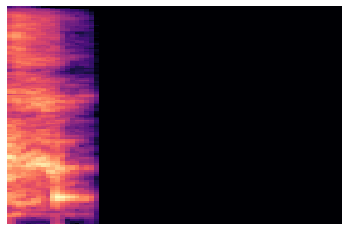

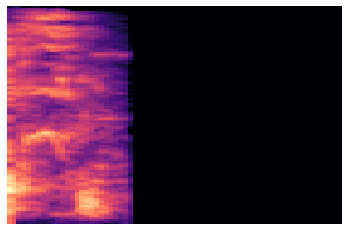

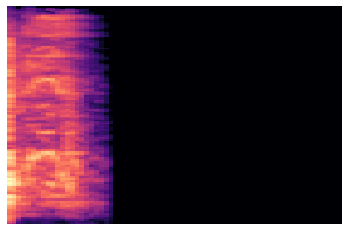

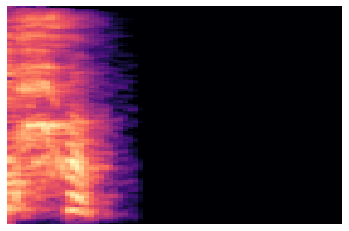

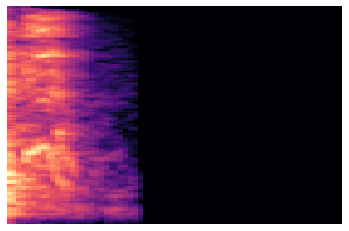

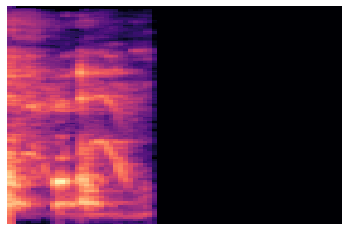

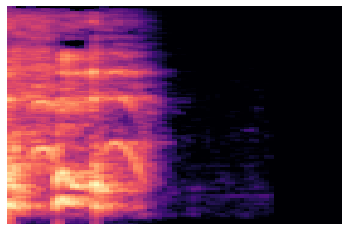

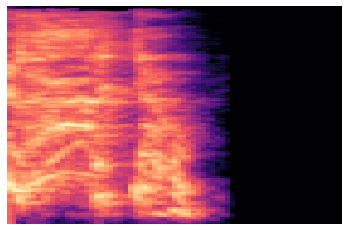

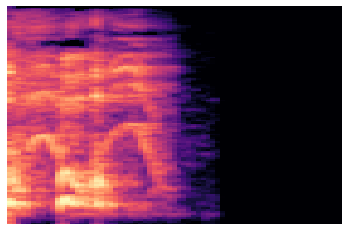

In [13]:
for key in master_dict:
    class_name = key
    class_list = master_dict[key]
    count = 0
    for file in class_list:
        count += 1
        y, sr = librosa.load(file)
        get_mel(y, sr, class_name, count)